In [6]:
library('tidyverse')
ds = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
ds %>% print
df = ds

Parsed with column specification:
cols(
  YEAR = col_double(),
  GoogleKnowlege_Occupation = col_character(),
  Show = col_character(),
  Group = col_character(),
  Raw_Guest_List = col_character()
)



# A tibble: 2,693 x 5
    YEAR GoogleKnowlege_Occupation Show    Group    Raw_Guest_List  
   <dbl> <chr>                     <chr>   <chr>    <chr>           
 1  1999 actor                     1/11/99 Acting   Michael J. Fox  
 2  1999 Comedian                  1/12/99 Comedy   Sandra Bernhard 
 3  1999 television actress        1/13/99 Acting   Tracey Ullman   
 4  1999 film actress              1/14/99 Acting   Gillian Anderson
 5  1999 actor                     1/18/99 Acting   David Alan Grier
 6  1999 actor                     1/19/99 Acting   William Baldwin 
 7  1999 Singer-lyricist           1/20/99 Musician Michael Stipe   
 8  1999 model                     1/21/99 Media    Carmen Electra  
 9  1999 actor                     1/25/99 Acting   Matthew Lillard 
10  1999 stand-up comedian         1/26/99 Comedy   David Cross     
# … with 2,683 more rows


In [10]:
ds.new = ds %>%
group_by(YEAR) %>%
count()

ds.new %>% head

YEAR,n
<dbl>,<int>
1999,166
2000,169
2001,157
2002,159
2003,166
2004,164


In [11]:
ds %>%
group_by(YEAR) %>%
count(Group)

YEAR,Group,n
<dbl>,<chr>,<int>
1999,Acting,108
1999,Comedy,25
1999,Media,11
1999,Musician,17
1999,Politician,2
1999,NA,3
2000,Acting,100
2000,Advocacy,1
2000,Athletics,3


In [14]:
ds %>% head

YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
<dbl>,<chr>,<chr>,<chr>,<chr>
1999,actor,1/11/99,Acting,Michael J. Fox
1999,Comedian,1/12/99,Comedy,Sandra Bernhard
1999,television actress,1/13/99,Acting,Tracey Ullman
1999,film actress,1/14/99,Acting,Gillian Anderson
1999,actor,1/18/99,Acting,David Alan Grier
1999,actor,1/19/99,Acting,William Baldwin


In [23]:
ds %>%
count(Group) %>% 
arrange(-n) %>%
head(1)

Group,n
<chr>,<int>
Acting,930


Within all guests, Actors appeared the most on the Daily Show. 

In [34]:
ds %>%
filter(Group == "Acting") %>%
count(Raw_Guest_List) %>%
arrange(-n) %>%
head(10)

top_actors = ds

Raw_Guest_List,n
<chr>,<int>
Denis Leary,17
Paul Rudd,13
Will Ferrell,10
Adam Sandler,8
Ben Affleck,8
Maggie Gyllenhaal,8
Colin Firth,7
Samuel L. Jackson,7
Steve Carell,7


Above are the top 10 actors on the Daily Show. 

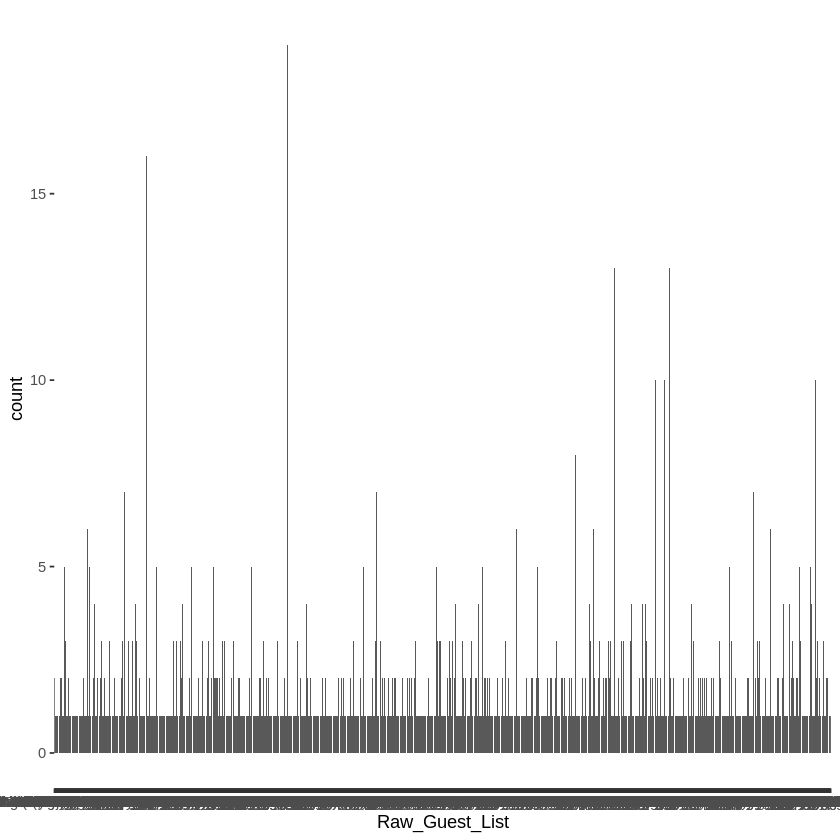

In [39]:
p = ggplot(top_actors, aes(x = Raw_Guest_List))
p = p + geom_bar()
p